In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [20]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


              id        V1        V2        V3        V4        V5        V6  \
id      1.000000 -0.395741  0.424267 -0.663655  0.617554 -0.268445 -0.387916   
V1     -0.395741  1.000000 -0.561184  0.484499 -0.498963  0.517462  0.354728   
V2      0.424267 -0.561184  1.000000 -0.627810  0.579638 -0.631669 -0.341040   
V3     -0.663655  0.484499 -0.627810  1.000000 -0.687726  0.510351  0.508974   
V4      0.617554 -0.498963  0.579638 -0.687726  1.000000 -0.429243 -0.474403   
V5     -0.268445  0.517462 -0.631669  0.510351 -0.429243  1.000000  0.245187   
V6     -0.387916  0.354728 -0.341040  0.508974 -0.474403  0.245187  1.000000   
V7     -0.414288  0.573381 -0.694022  0.634336 -0.588648  0.586828  0.418703   
V8      0.121282 -0.226757  0.191321 -0.263018  0.199013 -0.314975 -0.604491   
V9     -0.508427  0.548973 -0.585095  0.648615 -0.676648  0.479614  0.432241   
V10    -0.578014  0.599108 -0.621798  0.707676 -0.712839  0.563874  0.471000   
V11     0.589321 -0.525797  0.558863 -0.

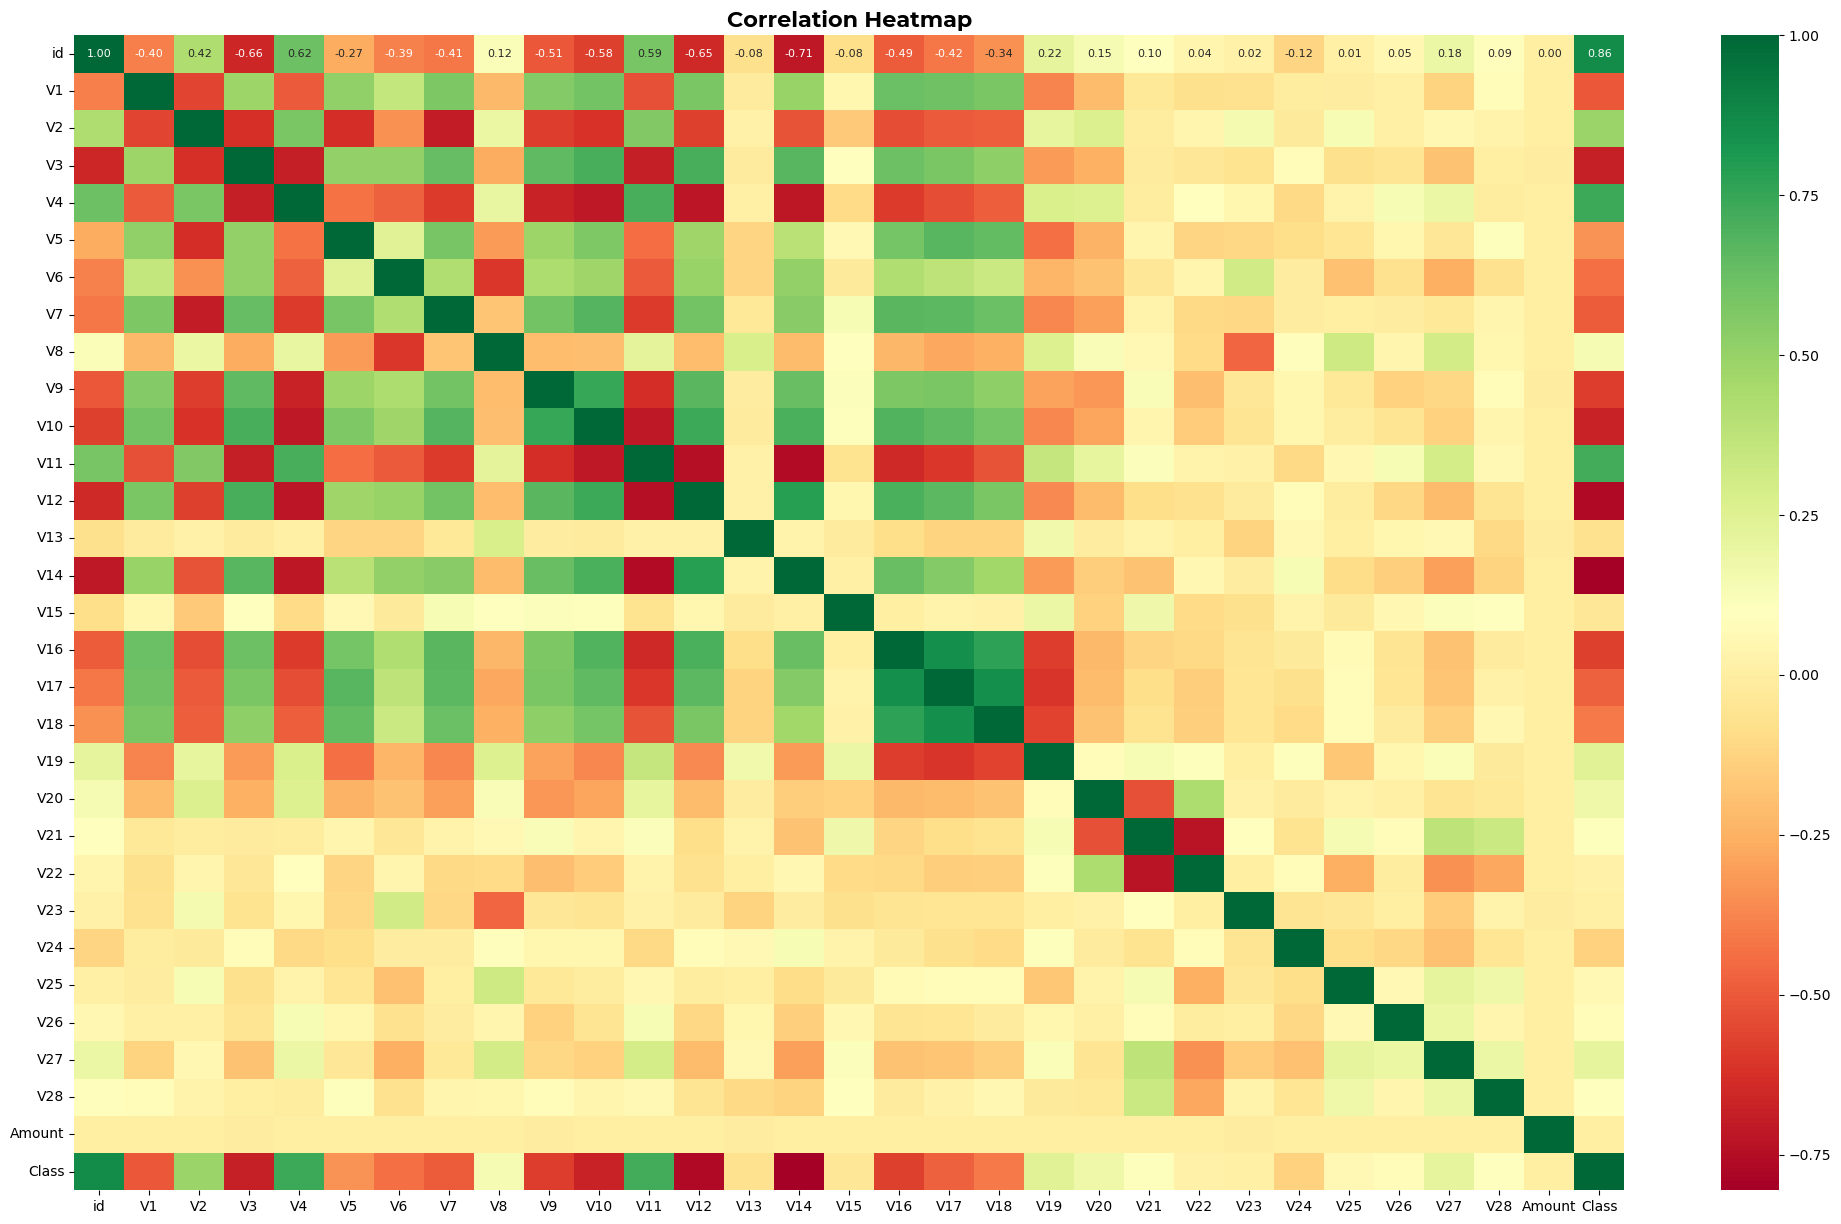

In [5]:
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, cmap='RdYlGn', annot=True, fmt='.2f', annot_kws={"size":8})
plt.title('Correlation Heatmap', font='montserrat', fontsize='16', weight='bold')
plt.show()

Class
0    284315
1    284315
Name: count, dtype: int64


c:\Users\acer\.conda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer\.conda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer\.conda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


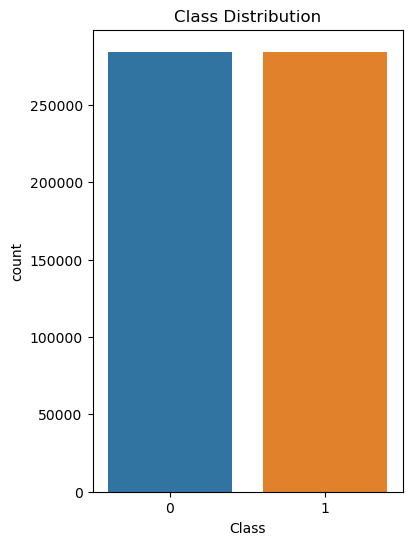

In [6]:
print(df['Class'].value_counts())
plt.figure(figsize=(4, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()


In [10]:
s = df.drop('Class', axis=1)
scaler = StandardScaler()
s_scaled = scaler.fit_transform(s)
y = df['Class']
x = pd.DataFrame(s_scaled,columns=s.columns)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(s_scaled, y, test_size=0.2, random_state=1)

In [12]:
print("x shape:", x.shape)
print("y shape:", y.shape)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x shape: (568630, 30)
y shape: (568630,)
x_train shape: (454904, 30)
y_train shape: (454904,)
x_test shape: (113726, 30)
y_test shape: (113726,)


In [13]:
baseline_accuracy = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(baseline_accuracy, 4))

Baseline Accuracy: 0.5001


In [14]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [15]:
model.predict(x_train)

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [16]:
y_pred = model.predict(x_test)

In [17]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56926
           1       1.00      1.00      1.00     56800

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

[[56873    53]
 [  123 56677]]
AUC-ROC: 0.9984517368854946


In [18]:
num_features = x_test.shape[1]
feature_indices = np.arange(num_features)

Top Feature Importances:
    Feature Index  Importance
0               0   15.206091
4               4    3.518136
11             11    2.848931
9               9    0.914314
13             13    0.741348


C:\Users\acer\AppData\Local\Temp\ipykernel_16336\3018280071.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Feature Index', y='Importance', data=feature_importance_df.head(5), palette='viridis', ci='sd')
c:\Users\acer\.conda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer\.conda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer\.conda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

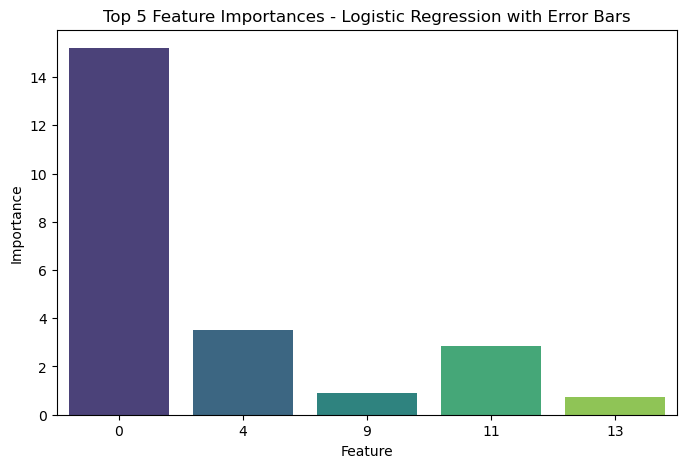

In [19]:
importances = model.coef_[0]

feature_importance_df = pd.DataFrame({'Feature Index': feature_indices, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top Feature Importances:")
print(feature_importance_df.head())

plt.figure(figsize=(8, 5))
sns.barplot(x='Feature Index', y='Importance', data=feature_importance_df.head(5), palette='viridis', ci='sd')
plt.title('Top 5 Feature Importances - Logistic Regression with Error Bars')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()